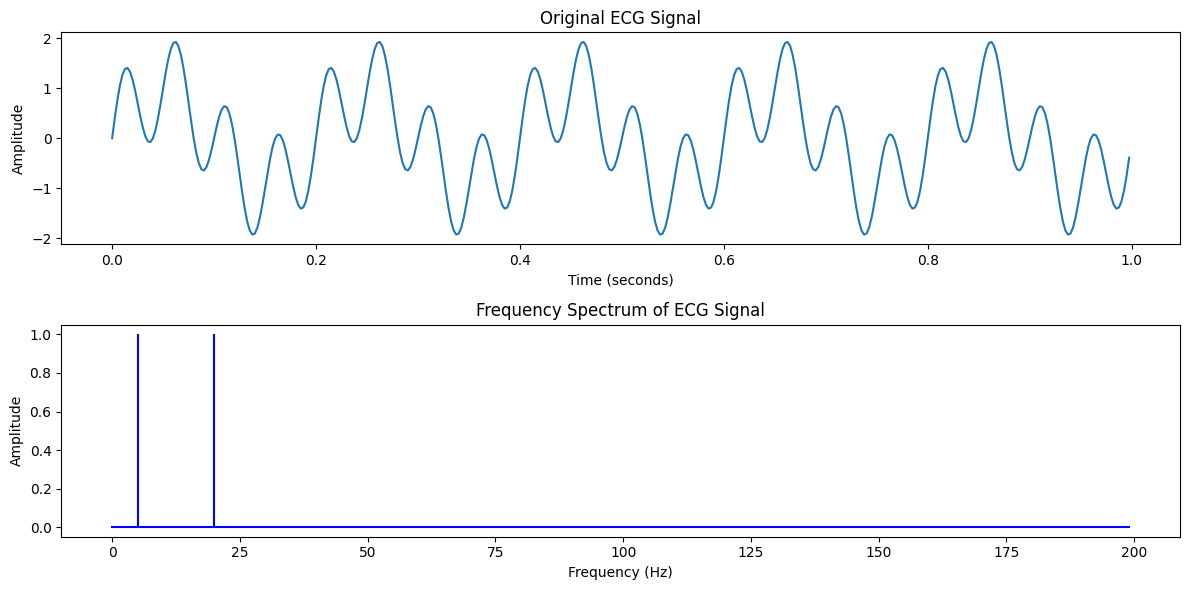

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating an ECG signal (for demonstration purposes, let's assume this is your ECG data)
# In a real-world scenario, you would replace this with actual ECG data.
t = np.linspace(0, 1, 400, endpoint=False)
ecg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)  # A simple mix of 5Hz and 20Hz components

# Applying Fast Fourier Transform (FFT)
ecg_fft = np.fft.fft(ecg_signal)
frequency = np.fft.fftfreq(t.shape[-1], d=t[1] - t[0])

# Only plotting the positive half of the frequencies and normalizing the amplitude
n = ecg_signal.size
amplitude = np.abs(ecg_fft)[:n // 2] * (2 / n)
positive_freq = frequency[:n // 2]

# Plotting the original ECG signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Original ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Plotting the Frequency Spectrum
plt.subplot(2, 1, 2)
plt.stem(positive_freq, amplitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Spectrum of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


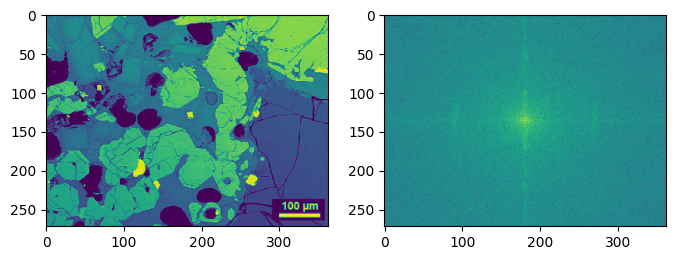

In [1]:
# covert from time or spatial domain to requency domain we can apply some operations then back to original
import cv2
from matplotlib import pyplot as plt
import numpy as np
img=cv2.imread("/content/BSE.jpg",0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2=fig.add_subplot(2,2,2)

ax2.imshow(20*np.log((cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))))
plt.show()


<ipython-input-15-a06cf9518021>:82: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


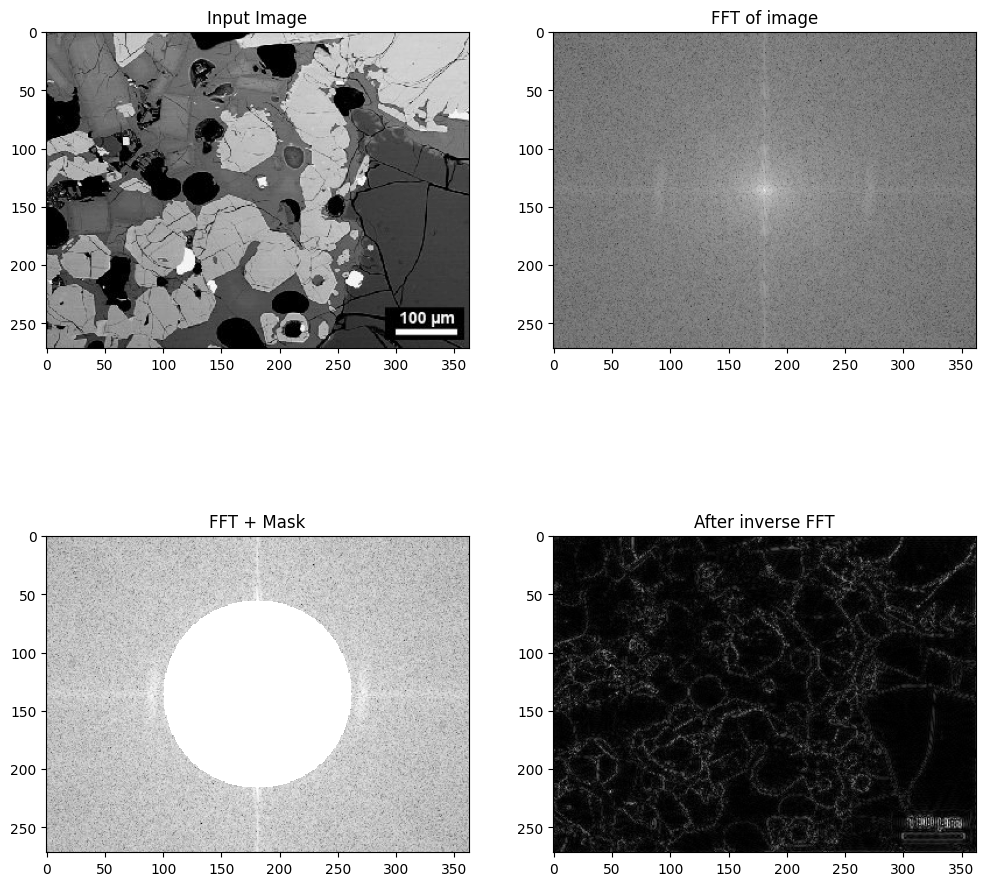

In [15]:
#!/usr/bin/env python

import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('/content/BSE.jpg', 0) # load an image

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
# Ensure that the input image is converted to the correct data type (float32)
img_float32 = np.float32(img)

# Convert the input image to a numpy array
img_array = np.array(img_float32)

# Apply the DFT # 2D complex array - 2 channels: real + imaginary
dft = cv2.dft(img_array, flags=cv2.DFT_COMPLEX_OUTPUT)


#Rearranges a Fourier transform X by shifting the zero-frequency
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log.
#So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask (high f go and filter low), center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""

# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


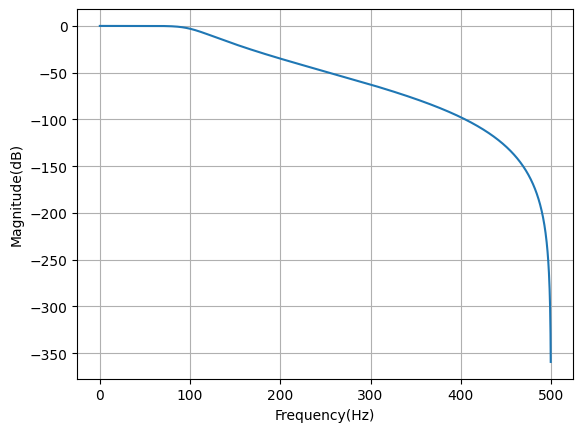

In [32]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from math import pi

plt.close('all')

# IIR butterworth filter
Fs = 1000
n = 5
fc = 100
w_c = 2 * fc / Fs
[b, a] = sig.butter(n, w_c)
#frequency response
[w,h]=sig.freqz(b,a,worN=2000)
w=Fs*w/(2*pi)
h_db=20*np.log10(abs(h))

plt.figure()
plt.plot(w,h_db)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.grid('on')

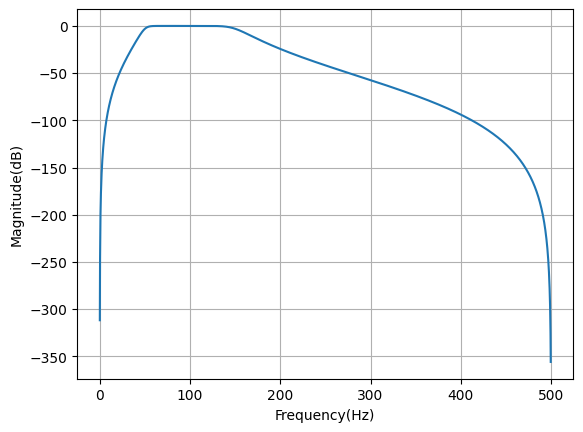

In [36]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from math import pi

plt.close('all')

# IIR butterworth filter
Fs = 1000
n = 5
fc =np.array([10,300]) ;
w_c = 2 * fc / Fs
b, a = sig.butter(n, [w_low, w_high], btype='bandpass')
#frequency response
[w,h]=sig.freqz(b,a,worN=2000)
w=Fs*w/(2*pi)
h_db=20*np.log10(abs(h))

plt.figure()
plt.plot(w,h_db)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.grid('on')

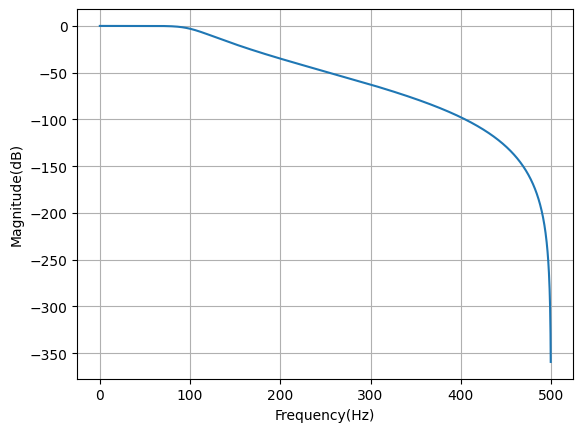

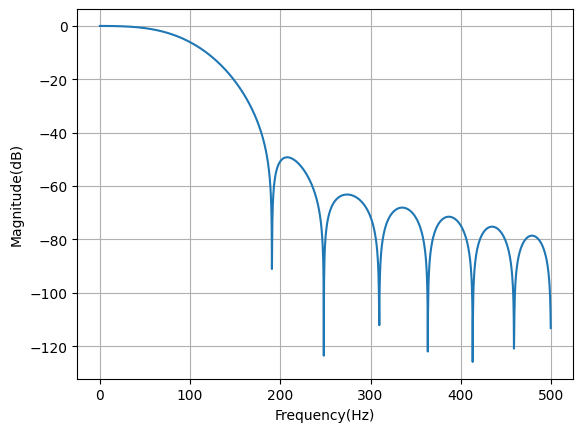

In [41]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from math import pi

plt.close('all')

# IIR butterworth filter
Fs = 1000
n = 5
fc = 100
w_c = 2 * fc / Fs
[b, a] = sig.butter(n, w_c)
#frequency response
[w,h]=sig.freqz(b,a,worN=2000)
w=Fs*w/(2*pi)
h_db=20*np.log10(abs(h))

plt.figure()
plt.plot(w,h_db)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.grid('on')

#FIR filter
N=20
fc = 100
w_c = 2 * fc / Fs
t=sig.firwin(N,w_c)

[w,h]=sig.freqz(t,worN=2000)
w=Fs*w/(2*pi)
h_db=20*np.log10(abs(h))
plt.figure(2)
plt.plot(w,h_db)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.grid('on')
